<div class="alert alert-block alert-success">

## <span style=" color:Purple"> Workshop Konusu </span>
Machine learning'in Classical Learning kısmının eğitim aşamasında  dataların insan eliyle makinaya sunulduğu SUPERVISED learning altindaki Regression metoduna ait bir örnegi Regresyon cesitleri ile çözeceğiz.
    
## <span style=" color:Purple"> Amacimiz </span>
Biweekly/Hourly Rate bilgisini label olarak kullanarak bir model olusturmak. Bu modeli egitip bunu regression methodlari ile basarisini olcecegiz.<p>

## <span style=" color:Purple"> Genel Bilgi </span>
    
REGRESSION     : sürekli bir miktarı tahmin etme görevidir.<p>
CLASSIFICATION : ayrı(0/1) bir sınıf etiketini tahmin etme görevidir.

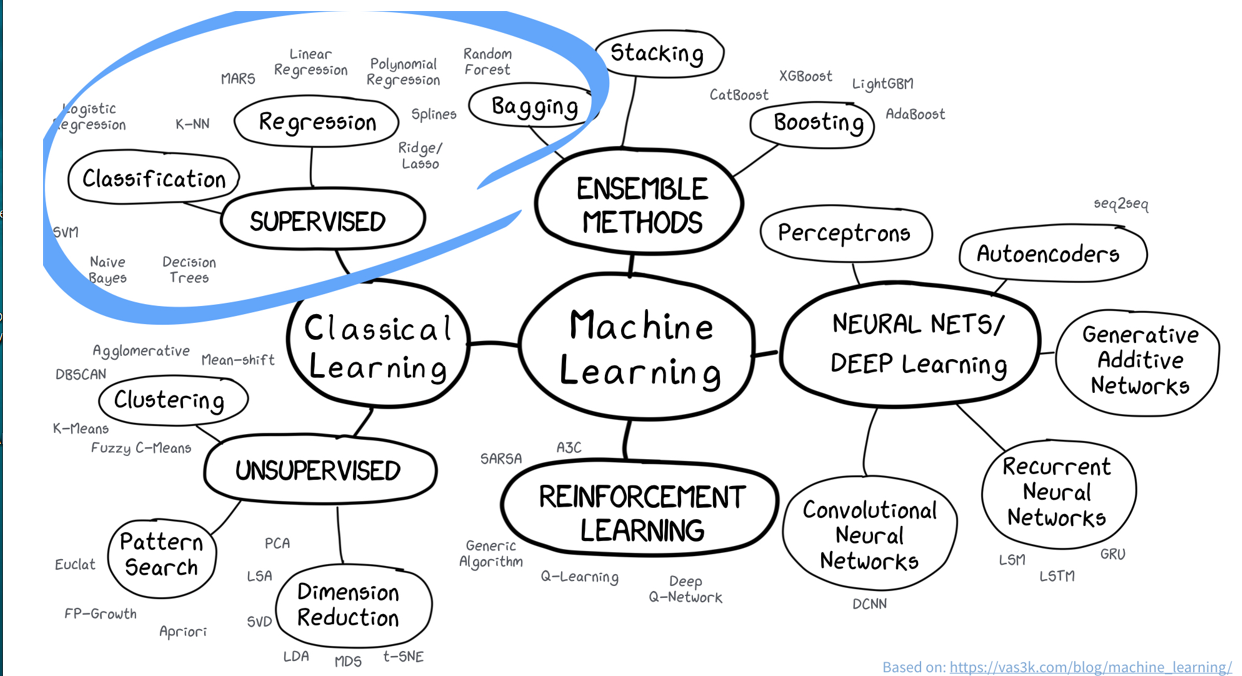

<div class="alert alert-block alert-danger"><p>
    
Lineer Regresyon hakkinda ders sonrasi genel bilgi edinmek isteyenler icin makaleler:
    
https://medium.com/data-science-tr/makine-%C3%B6%C4%9Frenmesi-dersleri-4a-lineer-regresyon-30fe61248e93 <p>
    
https://medium.com/deep-learning-turkiye/her-%C5%9Feyiyle-lineer-regresyon-makine-%C3%B6%C4%9Frenmesi-serisi-1-1ee2aec10b74
</div>

<div class="alert alert-block alert-info">

<b>Ilk kez yuklemek icin = !pip install pyforest</b>

 bu kütüphaneyi import ettiğimizde Data Analysis ve Machine Learning'de en populer kütüphaneleri tek tek
 import etmeye gerek kalmıyor. (içinde en sık kullanılan kütüphaneler mevcut)
    
   Yellowbrick, Scikit-Learn`i Matplotlib ile birleştirerek modelinize göre görselleştirme üreten bir görsel tanı araçları paketidir.

In [1]:
import pyforest
import scipy.stats as stats
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('PAYROL_NY_STATE.csv')

<IPython.core.display.Javascript object>

In [3]:
df.sample(10)

,NAME,OFFICE,TITLE,CITY,BIWEEKLT/HOURLY RATE,PAYROL TYPE,PAY PERIOD,LEGISLATIVE ENTITY
421,"GIUDICE, ANTHONY","SENATOR JOSEPH P. ADDABBO, JR.",PRESS SECRETARY/SPECIAL EVENTS COORD,HOWARD BEACH,1634.62,RA,4,SENATE EMPLOYEE
121,"BREEN, KEVIN P",SENATE SERGEANT-AT-ARMS,SESSION SERGEANT-AT-ARMS,ALBANY,1153.85,SA,4,SENATE EMPLOYEE
782,"NOONEY, MELISSA D",MINORITY CONFERENCE SERVICES,CREATIVE SERVICES DIRECTOR,ALBANY,2734.79,RA,4,SENATE EMPLOYEE
593,"LAIDLEY, JASON D",SENATOR JAMAAL BAILEY,CHIEF OF STAFF,BRONX,4538.47,RA,4,SENATE EMPLOYEE
713,"MEYERS, HALIE J",SENATOR TODD KAMINSKY,CHIEF OF STAFF,ROCKVILLE CENTRE,4076.93,RA,4,SENATE EMPLOYEE
298,"DULONG, JESSICA A",CH/JOURNAL CLERK'S OFFICE,DESK OPERATIONS CLERK,ALBANY,1177.82,RA,4,SENATE EMPLOYEE
123,"BRENNAN, WENDY",SENATOR ELIZABETH KRUEGER,COMMUNITY OUTREACH & CONSTITUENT SER,NEW YORK,2192.31,RA,4,SENATE EMPLOYEE
925,"ROMEO, MARY",SENATOR PHILIP BOYLE,OFFICE ASSISTANT,BAY SHORE,569.35,SA,4,SENATE EMPLOYEE
852,"POPE, TAMARA L",SEN STUDENT PROGRAM OFF/FELLOWS,SENATE FELLOW,ALBANY,1571.43,SA,4,SENATE EMPLOYEE
5,"ADDOH, ISAAC",SENATOR JAMAAL BAILEY,COMMUNITY LIAISON,BRONX,609.63,SA,4,SENATE EMPLOYEE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NAME                  1000 non-null   object 
 1   OFFICE                1000 non-null   object 
 2   TITLE                 1000 non-null   object 
 3   CITY                  1000 non-null   object 
 4   BIWEEKLT/HOURLY RATE  1000 non-null   float64
 5   PAYROL TYPE           1000 non-null   object 
 6   PAY PERIOD            1000 non-null   int64  
 7   LEGISLATIVE ENTITY    1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
df.shape

# 1000 satır 8 sütun.

(1000, 8)

In [6]:
df.duplicated().sum()

# datamda tekrar eden sonuç olmadığını gördüm.

0

In [7]:
for column in df.select_dtypes('object').columns:
    print(f'Column {column} has {df[column].nunique()} unique values.')

Column NAME has 1000 unique values.
Column OFFICE has 114 unique values.
Column TITLE has 429 unique values.
Column CITY has 55 unique values.
Column PAYROL TYPE has 3 unique values.
Column LEGISLATIVE ENTITY has 2 unique values.


<div class="alert alert-block alert-info">
    Ilk goruste farkedebildigimiz; "Name" columnu tamamen unique değerlerden oluştuğu için modelimin eğitilmesinde fayda sağlamayacak.

In [8]:
df['PAY PERIOD'].nunique()

# bu column da tek bir unique değer var (4) dolayısıyla modelime bir katkı sağlamayacak.

1

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BIWEEKLT/HOURLY RATE,1000.0,2129.12208,1144.883266,11.1,1423.08,1923.08,2692.31,7115.39
PAY PERIOD,1000.0,4.00000,0.000000,4.0,4.00,4.00,4.00,4.00


<div class="alert alert-block alert-warning"> 
<b> "BIWEEKLT/HOURLY RATE" featurunun statitics'leri.</b> <p>
    
* std meanden büyükse outlier sorunu olabilir,<p>

* 25 ile min veya 75 ile max. arasında ciddi bir fark varsa outlier üzerinde durulmalı.<p>
    
1- mean değerimizin ise median değerine göre önemli ölçüde büyük olduğunu ve median değerinin sağında kaldığını görüyoruz. Bu sağa skewed olduğunu gösteriyor. Mean, tüm değerlerimin ortalamasıdır. Değerlerimin ortalamasının tam ortadaki değerimin sağına kayması demek sağ tarafta mean'i kendinlerine doğru çeken önemli ağırlıkta değerlerim olduğunu gösterir.  <p>
2- standart dev. değerimin mean'den büyük olmasa da (yarısından fazla miktarda) önemli bir büyüklüğe sahip olduğunu 
ve min. değerinin mean'e göre çok küçük kaldığını ve 25% ile min arasında 25% - %50 arasındaki farka göre çok daha büyük bir fark olduğunu görüyoruz.
Bu nedenle sol tarafta outlier olabileceğini düşünebiliriz. <p>

In [10]:
pd.qcut(df['BIWEEKLT/HOURLY RATE'].sort_values(), q=4).value_counts()

<IPython.core.display.Javascript object>

(11.099, 1423.08]     253
(1423.08, 1923.08]    249
(1923.08, 2692.31]    249
(2692.31, 7115.39]    249
Name: BIWEEKLT/HOURLY RATE, dtype: int64

 <div class="alert alert-block alert-info">
    BIWEEKLT/HOURLY RATE columnunu qcut ile ve q=4 parametresini vererek 4 eşit % parçaya böldük. her parçaya kaç observation düştüğünü gördük.<p>
    "qcut" komutu elimizdeki veriyi yuzdesel(%) olarak istenilen sayida parcaya ayirmaya yarar.

<div class="alert alert-block alert-warning">
    Eğer outlier olmasa idi, % 25 lik dilimlere düşen value_count adedinin eşit olmasını beklerdik. 
    Ancak min. tarafındaki çeyrekte value adedinin (253) diğer çeyreklerden (249) fazla olması burada outlierlar olabileceğini gösteriyor. ( ancak 253 adet value ile o çeyrek diğer çeyreklerle eşit duruma gelebilmiş.) 
    Aynı şekilde eğer outlierlar max. tarafında olsa idi; max tarafındaki çeyreğe düşen value adedi bu sefer diğer çeyreklerden AZ olması beklenirdi. Çünkü max tarafındaki outlier değeri büyük olacağından bu sefer oradaki çeyreğin diğer çeyreklerle anı değere sahip hale getirecek value adedinin daha düşük olması beklenirdi)

In [11]:
df.skew()

BIWEEKLT/HOURLY RATE    0.929653
PAY PERIOD              0.000000
dtype: float64

 <div class="alert alert-block alert-info">
lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.<p>

eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz ve dolayısıyla lineer regression için uygundur. <p>

0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız.<p>

In [12]:
df['BIWEEKLT/HOURLY RATE'].mean()
# ortalama ücret 2129.

2129.1220800000037

 <div class="alert alert-block alert-info">
    200'den kucuk degerlerin 1 saatlik ucret oldugunu ongoruyoruz. O yuzden o degerler yanlis bilgi iceriyor ve duzeltilmesi gerekiyor.

In [13]:
df[df['BIWEEKLT/HOURLY RATE'] < 200].shape

# bu column da hem biweekly (2 haftalık) hem hourly ücretler var! 

(37, 8)

 <div class="alert alert-block alert-info">
 
Dolayısıyla 200'ün altındaki değerlerin 1 saatlik ücret olduğu düşüncesinden yola çıkarak; <p>
düzeltmek icin 200 altındaki value lerı 2 Haftalık [Biweekly] (80 Saatlik) sureyle carpıp diğerleri ile aynı birime çeviriyoruz.

In [14]:
df['BIWEEKLT/HOURLY RATE'] = df['BIWEEKLT/HOURLY RATE'].map(lambda x: x*80 if x<200 else x)

In [15]:
df['BIWEEKLT/HOURLY RATE'].min()

# şimdi artık biweekly olan değerlerin ilki 230.77 oldu.

230.77

 <div class="alert alert-block alert-info">
<b>z-table'a baktığımda 1.96 std. değerine karşılık gelen probablity % 97.5
bu her iki taraftan %2.5 hata demektir. yani alfa (hata) değerim %5 olduğundan Confidence interval (Ci) % 95 dir.</b>

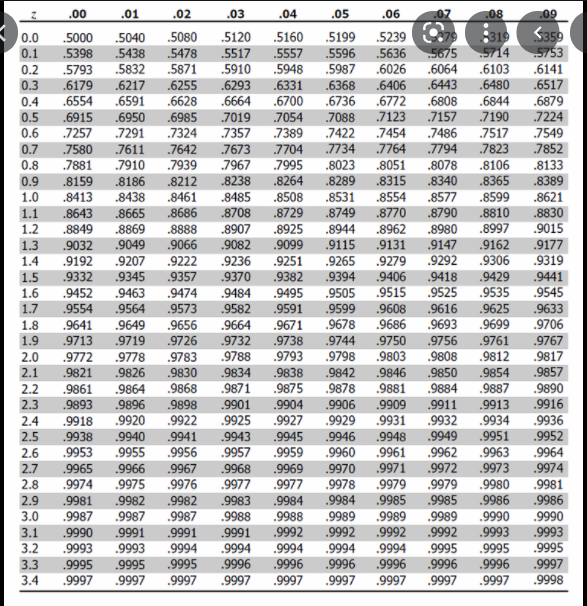

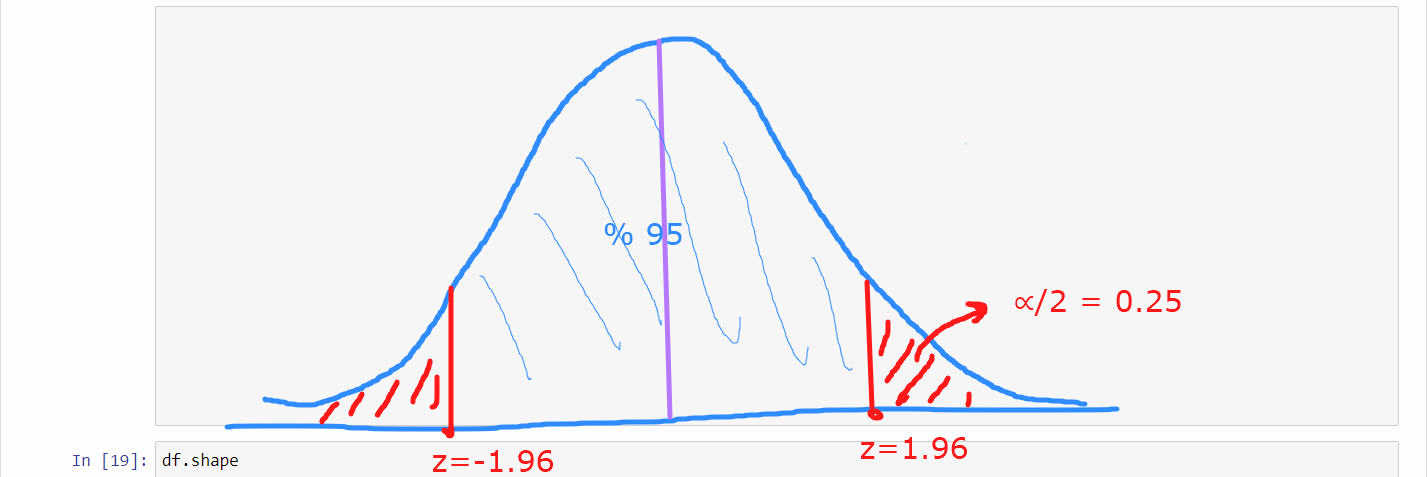

Buyuk hatalara sahip olan observationlarimi datasetimden cikartarak outlierlarin etkisini elimine ediyoruz. Bunu yaparken ki kriterimiz alpha degerime karsilik gelen araliktaki hata degerleridir.

In [16]:
df = df[~df['BIWEEKLT/HOURLY RATE'].transform(lambda x: abs(x-x.mean()) > 1.96*x.std()).values]

 <div class="alert alert-block alert-info">
<b>%95 Guven araliginda calismayi hedefledik. Belirlenen Confidence Interval [CI] araliginda calismak icin, datamizin uc kisimlarindaki verileri ayikliyoruz.</b><p> --sağ ve sol traftaki alfa/2 probability içinde kalan değerleri kırptık.<p>
<b>Transform Komutu ile bu guven araliginda kalan gözlemleri tespit edip datasetimizden cikartiyoruz.</b><p></p>
       --dolayısıyla  %95 CI içinde kalan gözlemleri seçerek df'imi yeniden oluşturdum</p>

In [17]:
df.shape

# Islem sonucu datamın toplam 1000 satırdan 963 satıra indiğini gördük.

(963, 8)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BIWEEKLT/HOURLY RATE,963.0,2088.819128,917.680439,230.77,1461.54,1923.08,2692.31,4919.24
PAY PERIOD,963.0,4.000000,0.000000,4.00,4.00,4.00,4.00,4.00


In [19]:
df.tail()

,NAME,OFFICE,TITLE,CITY,BIWEEKLT/HOURLY RATE,PAYROL TYPE,PAY PERIOD,LEGISLATIVE ENTITY
995,"SHROUT, JACKSON K",SENATOR TODD KAMINSKY,COMMUNITY LIAISON,ROCKVILLE CENTRE,1538.47,RA,4,SENATE EMPLOYEE
996,"SHUFON JR, ANTHONY A",SS/PRODUCTION SERVICES,DATA ANALYST,ALBANY,2180.24,RA,4,SENATE EMPLOYEE
997,"SHUTTER, WILLIAM J",SS/PRODUCTION SERVICES,MAILING OPERATOR II,ALBANY,1770.23,RA,4,SENATE EMPLOYEE
998,"SIERZEGA, KIMBERLY",SENATE TECHNOLOGY SERVICES,SENIOR OFFICE SUPPORT REPRESENTATIVE,ALBANY,2917.25,RA,4,SENATE EMPLOYEE
999,"SILVERSTEIN, CHARLES P",MINORITY COUNSEL/PROGRAM,LEGISLATIVE ANALYST,ALBANY,1923.08,RA,4,SENATE EMPLOYEE


<div class="alert alert-block alert-danger">
    index numaralarının değişmediğine dikkat et! Indexlerin guncellenmesi gerekiyor.

In [20]:
df.reset_index(drop=True, inplace=True)

#  reset_index metodu ile indeksleri 0'dan sıralı olarak artacak şekilde yeniden belirliyorum.

In [21]:
df.tail()
# index numaralarım düzeldi. son satır 962.

,NAME,OFFICE,TITLE,CITY,BIWEEKLT/HOURLY RATE,PAYROL TYPE,PAY PERIOD,LEGISLATIVE ENTITY
958,"SHROUT, JACKSON K",SENATOR TODD KAMINSKY,COMMUNITY LIAISON,ROCKVILLE CENTRE,1538.47,RA,4,SENATE EMPLOYEE
959,"SHUFON JR, ANTHONY A",SS/PRODUCTION SERVICES,DATA ANALYST,ALBANY,2180.24,RA,4,SENATE EMPLOYEE
960,"SHUTTER, WILLIAM J",SS/PRODUCTION SERVICES,MAILING OPERATOR II,ALBANY,1770.23,RA,4,SENATE EMPLOYEE
961,"SIERZEGA, KIMBERLY",SENATE TECHNOLOGY SERVICES,SENIOR OFFICE SUPPORT REPRESENTATIVE,ALBANY,2917.25,RA,4,SENATE EMPLOYEE
962,"SILVERSTEIN, CHARLES P",MINORITY COUNSEL/PROGRAM,LEGISLATIVE ANALYST,ALBANY,1923.08,RA,4,SENATE EMPLOYEE


In [22]:
df.columns = df.columns.str.capitalize()

In [23]:
df.head()

,Name,Office,Title,City,Biweeklt/hourly rate,Payrol type,Pay period,Legislative entity
0,"ABBOT, JUDITH L",SENATOR TOBY ANN STAVISKY,COMMUNITY LIAISON,FLUSHING,1076.93,SA,4,SENATE EMPLOYEE
1,"ABREU, BRIAN A",LEGISLATIVE MESSENGER SERVICE,MESSENGER,ALBANY,1173.93,RA,4,JOINT LEGISLATIVE EMPLOYEE
2,"ABREU, TYDIE Z",SENATE FINANCE COMMITTEE/MAJORITY,SENIOR ANALYST,ALBANY,2692.31,RA,4,SENATE EMPLOYEE
3,"ACEVEDO, SAMANTHA I",SENATOR JESSICA RAMOS,SR. DIR. LEG. AFFRS / COMMITTEE DIR.,ALBANY,2307.70,RA,4,SENATE EMPLOYEE
4,"ADAMS, DAVID V",SENATE SERGEANT-AT-ARMS,SESSION SERGEANT-AT-ARMS,ALBANY,820.95,SA,4,SENATE EMPLOYEE


<div class="alert alert-block alert-warning">
    Sutunlarimizin bir Machine Learning algoritmasi icin anlamliligini kontrol edecegiz. Gereksiz ve anlamsiz olanlarin ayiklanmasi gerekecek.

In [24]:
for col in df.columns:
    print(f"'{col}' has {df[col].nunique()} unique items")
    if df[col].nunique() == 1 or df[col].nunique() == len(df):
        print(f"\nyou can drop {col} feature \n")

'Name' has 963 unique items

you can drop Name feature 

'Office' has 112 unique items
'Title' has 406 unique items
'City' has 53 unique items
'Biweeklt/hourly rate' has 417 unique items
'Payrol type' has 3 unique items
'Pay period' has 1 unique items

you can drop Pay period feature 

'Legislative entity' has 2 unique items


<div class="alert alert-block alert-info">
 1- bir column'un ("Name") tüm değerleri unique.<p>
 2- bir column ise tek bir unique değere sahip ("Pay Period" columnu sadece 4 value'larından oluşuyor)<p> 
<b>--Bu iki column(sutun/feature)'u modelime bir faydası olmayacağı için düşürmeye karar veriyoruz.</b><p>
 3-"Title" column'u ise 406 unique değeri var. Neredeyse datasetin yarisi kadar, bunu da incelememiz gerekir.  

In [25]:
df1 = df.drop(["Name", "Pay period"], axis= 1).copy()

In [26]:
df1.head()
#Guncellenmis Datasetimiz

,Office,Title,City,Biweeklt/hourly rate,Payrol type,Legislative entity
0,SENATOR TOBY ANN STAVISKY,COMMUNITY LIAISON,FLUSHING,1076.93,SA,SENATE EMPLOYEE
1,LEGISLATIVE MESSENGER SERVICE,MESSENGER,ALBANY,1173.93,RA,JOINT LEGISLATIVE EMPLOYEE
2,SENATE FINANCE COMMITTEE/MAJORITY,SENIOR ANALYST,ALBANY,2692.31,RA,SENATE EMPLOYEE
3,SENATOR JESSICA RAMOS,SR. DIR. LEG. AFFRS / COMMITTEE DIR.,ALBANY,2307.70,RA,SENATE EMPLOYEE
4,SENATE SERGEANT-AT-ARMS,SESSION SERGEANT-AT-ARMS,ALBANY,820.95,SA,SENATE EMPLOYEE


<div class="alert alert-block alert-info">
    Simdi "Title" featuremuzu inceleyecegiz.

In [27]:
(df1.Title.value_counts()==1).sum()
# unique değerler arasında 283 değerim datamda yalnızca bir defa geçmiş.283/406 buyuk bir oran. 
# Bu sütunun modelime çok sınırlı bir katkı saylayabileceğini değerlendiriyorum

283

In [28]:
(df1.Office.value_counts()==1).sum()
# Bilgi amacli; Office columnunda 5 satir tekrarlamamıs. Dikkat ceken bir durum goremedik.

5

In [29]:
#!pip install seaborn

**

<div class="alert alert-block alert-success">
Gorsel olarak datayi incelemek icin seaborn kutuphanesi kullanmaya basliyoruz. <p>


-Yukarida "Title" sutunumuzdaki dagilim dikkatimizi cekti. Onuda kisaca bir incelecegiz.

In [30]:
import seaborn as sns

<IPython.core.display.Javascript object>

C:\Users\w14039128\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


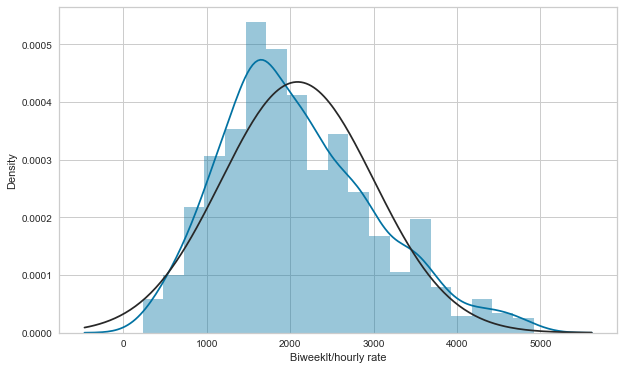

In [31]:
plt.figure(figsize=(10, 6))
sns.distplot(df1['Biweeklt/hourly rate'], fit=stats.norm);

In [32]:
stats.skew(df1['Biweeklt/hourly rate'])

0.6036242553202789

<div class="alert alert-block alert-success">
    <b><i>Yorum</i></b>:    Datamızın Biweeklt/hourly rate target'ının 0.60 ile orta derecede sağa skewed olduğunu anlıyoruz.<p>

In [33]:
list_of_least_title = []
for i in df1.Title.unique():
    if df.Title.value_counts()[i] < 2 :
        list_of_least_title.append(i)

In [34]:
list_of_least_title

['SR. DIR. LEG. AFFRS / COMMITTEE DIR.',
 'TECHNICAL SUPPORT REPRESENTATIVE',
 'DISTRICT POLICY & ORGANIZING DIRECTO',
 'EXTERNAL RELATIONS LEGISLATIVE AIDE',
 'DISTRICT OFFICE COORDINATOR',
 'DIRECTOR OF COMMUNITY RELATIONS',
 'TRANSLATOR',
 'EMPLOYEE BENEFITS ASSISTANT',
 'ATTORNEY',
 'EXECUTIVE ASSISTANT/ALBANY OFFICE MA',
 'SENIOR CYBERSECURITY ADVISOR',
 'HEALTH COMMITTEE & POLICY ANALYST',
 'DRIVER',
 'SPECIAL ASSISTANT/SCHEDULER',
 'LAW LIBRARY ASSISTANT',
 'CONSTITUENT SERVICE AIDE',
 'DIRECTOR OF PRODUCTIONS',
 'DIRECTOR OF ECONOMIC DEVELOPMENT',
 'CHIEF OF STAFF, DISTRICT',
 'DOWNSTATE OPERATIONS COORDINATOR',
 'COMMUNITY AFFAIRS COORD / SCHEDULER',
 'ACTING CHIEF OF STAFF',
 'MANAGER STS EDUC. AND SUPPORT',
 'DIRECTOR OF DISTRICT OFCE OPERATIONS',
 'WEB & OPEN PROJECTS COORDINATOR',
 'FISCAL ANALYST',
 'SR. ADVSR AGING POLICY & SPEC. PROJ',
 'ASSISTANT DIRECTOR',
 'ASSISTANT CHIEF OF FURNISHINGS',
 'EXECUTIVE ASSISTANT/COMMITTEE CLERK/',
 'COMPLIANCE ASSISTANT',
 'SHOP SUPER

In [35]:
len(list_of_least_title)

# "Title" feature unda 283 değerin yalnızca 1 defa geçtiğini bu yolla teyid etmiş olduk.

283

In [36]:
df1[df1.Title.isin(list_of_least_title)]

# Title feature'unda yalnızca 1 adet value'ya sahip olan satırları aşağıda dataframe olarak görüntüledik. 

,Office,Title,City,Biweeklt/hourly rate,Payrol type,Legislative entity
3,SENATOR JESSICA RAMOS,SR. DIR. LEG. AFFRS / COMMITTEE DIR.,ALBANY,2307.70,RA,SENATE EMPLOYEE
10,SENATE TECHNOLOGY SERVICES,TECHNICAL SUPPORT REPRESENTATIVE,ALBANY,1307.70,RA,SENATE EMPLOYEE
13,SENATOR JESSICA RAMOS,DISTRICT POLICY & ORGANIZING DIRECTO,EAST ELMHURST,2000.00,RA,SENATE EMPLOYEE
20,MAJORITY CONFERENCE SERVICES,EXTERNAL RELATIONS LEGISLATIVE AIDE,ALBANY,2115.39,SA,SENATE EMPLOYEE
31,SENATOR SUSAN SERINO,DISTRICT OFFICE COORDINATOR,PUTNAM VALLEY,2307.70,RA,SENATE EMPLOYEE
...,...,...,...,...,...,...
947,SENATOR JAMES SANDERS,TEAM COUNSEL,ALBANY,2500.00,RA,SENATE EMPLOYEE
948,SENATOR ANNA M. KAPLAN,CHIEF OF STAFF/COUNSEL,ALBANY,4615.39,RA,SENATE EMPLOYEE
950,SENATE M&O/POST OFFICE,POSTMASTER,ALBANY,2628.45,RA,SENATE EMPLOYEE
952,MAJORITY COUNSEL/PROGRAM,POLICY ASSISTANT,ALBANY,1538.47,RA,SENATE EMPLOYEE


<div class="alert alert-block alert-info">
    <b><i>Yorum</i></b>: Incelememiz sonucunda "Title" sütunun modelime çok az katkı saylayacağını dusunuyoruz [283/406], iliski kurmamizda pek faydasi olmayacak gibi gorunuyor. Birde Get dummies uyguladigimizdada tabloyu hatiri sayilir miktarda genisletecek.

In [37]:
df1.head()

,Office,Title,City,Biweeklt/hourly rate,Payrol type,Legislative entity
0,SENATOR TOBY ANN STAVISKY,COMMUNITY LIAISON,FLUSHING,1076.93,SA,SENATE EMPLOYEE
1,LEGISLATIVE MESSENGER SERVICE,MESSENGER,ALBANY,1173.93,RA,JOINT LEGISLATIVE EMPLOYEE
2,SENATE FINANCE COMMITTEE/MAJORITY,SENIOR ANALYST,ALBANY,2692.31,RA,SENATE EMPLOYEE
3,SENATOR JESSICA RAMOS,SR. DIR. LEG. AFFRS / COMMITTEE DIR.,ALBANY,2307.70,RA,SENATE EMPLOYEE
4,SENATE SERGEANT-AT-ARMS,SESSION SERGEANT-AT-ARMS,ALBANY,820.95,SA,SENATE EMPLOYEE


In [38]:
df2 = pd.get_dummies(df1, drop_first=True)

# kategorik verileri dummies yaptım. artık datam modele sokmaya hazır halde.

<IPython.core.display.Javascript object>

In [39]:
df2.sample(10)

,Biweeklt/hourly rate,Office_CH/DOCUMENT ROOM,Office_CH/JOURNAL CLERK'S OFFICE,Office_FO/ACCOUNTS PAYABLE,Office_FO/PAYROLL,Office_LC/DEVELOPMENT OF RURAL RESOURCES,Office_LC/LEGISLATIVE ETHICS COMMISSION,Office_LEGISLATIVE HEALTH SERVICE,Office_LEGISLATIVE LIBRARY,Office_LEGISLATIVE MESSENGER SERVICE,...,City_STATEN ISLAND,City_SYOSSET,City_SYRACUSE,City_UTICA,City_WATERTOWN,City_WILLIAMSVILLE,City_YONKERS,Payrol type_SA,Payrol type_TE,Legislative entity_SENATE EMPLOYEE
515,2423.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88,2307.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
870,2769.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
449,2423.09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
234,2307.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
367,1593.56,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
391,1923.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
347,2692.31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
713,3095.51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,2423.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### <div class="alert alert-block alert-info"><b>EDA kısmı tamamlandı. Şu andan itibaren Machine Learning modeli tasarlamaya geçiyoruz.</b>

In [40]:
# Performance parametrelerimizi gosterecek fonksiyonumuz
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

<div class="alert alert-block alert-info">

## <span style=" color:purple"> Tanimlamalar</span>       
Target/label feature'ım "y" (yani bağımlı değişkenim) olan Biweeklt/hourly rate i düşürerek geri kalan featureları (bağımsız değişkenleri) X'e,yani datasetimiz olarak belirledik.
 <p>
y= Label<p>
X= Features<p> </div>

In [41]:
X = df2.drop("Biweeklt/hourly rate",axis=1)
y = df2["Biweeklt/hourly rate"]

In [42]:
X.shape

(963, 571)

In [43]:
y.shape

(963,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
NOT: her seferinde train ve test değerlerim değişmesin diye bu değerleri sabitlemek için "random_state=42" kullandık. Egitim amacli bir calismada farklı metodlar denediğimizde bunları kıyaslamak anlamlı olabilsin diye veya takım arkadaşlarımın yaptığı çalışmaların sonuçlarını benimki ile kıyaslamak anlamlı olabilsin diye..

# Linear Regression

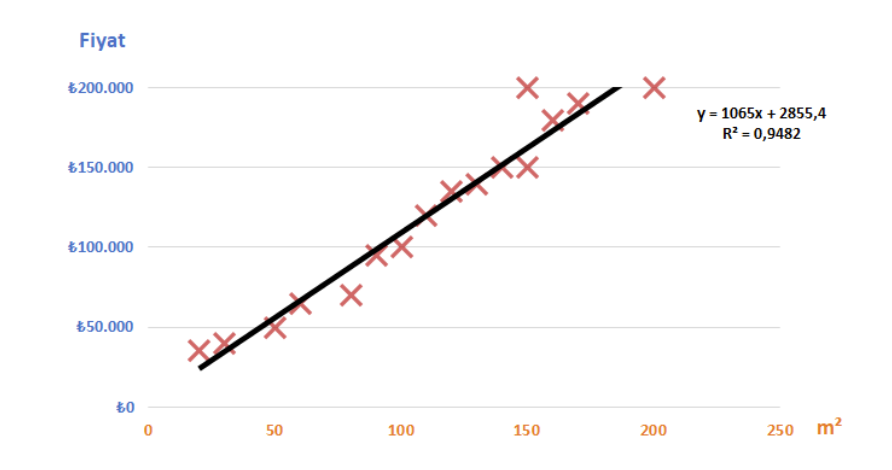

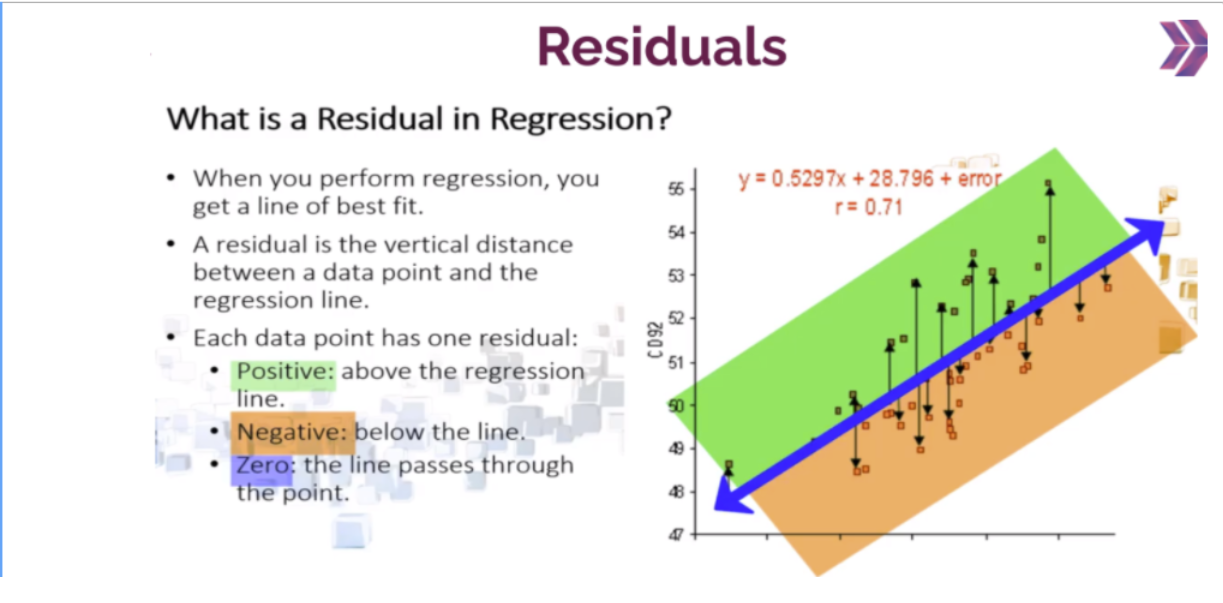

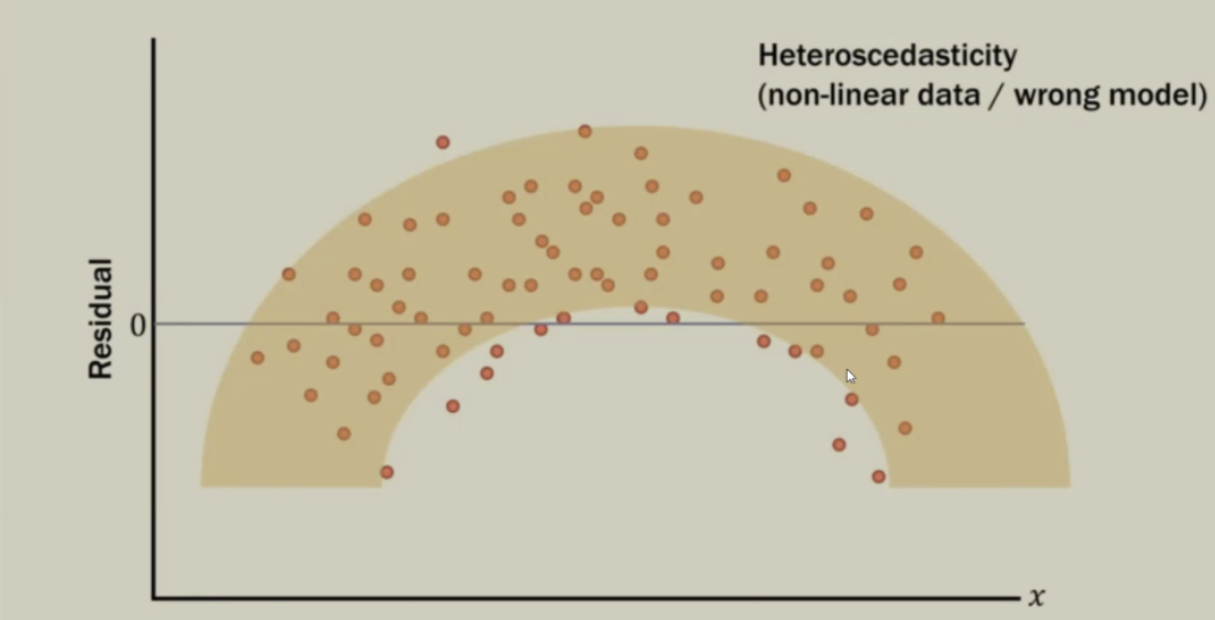

<div class="alert alert-block alert-info">
    **linear regresyona uygun bir datanın residual görünümü :**

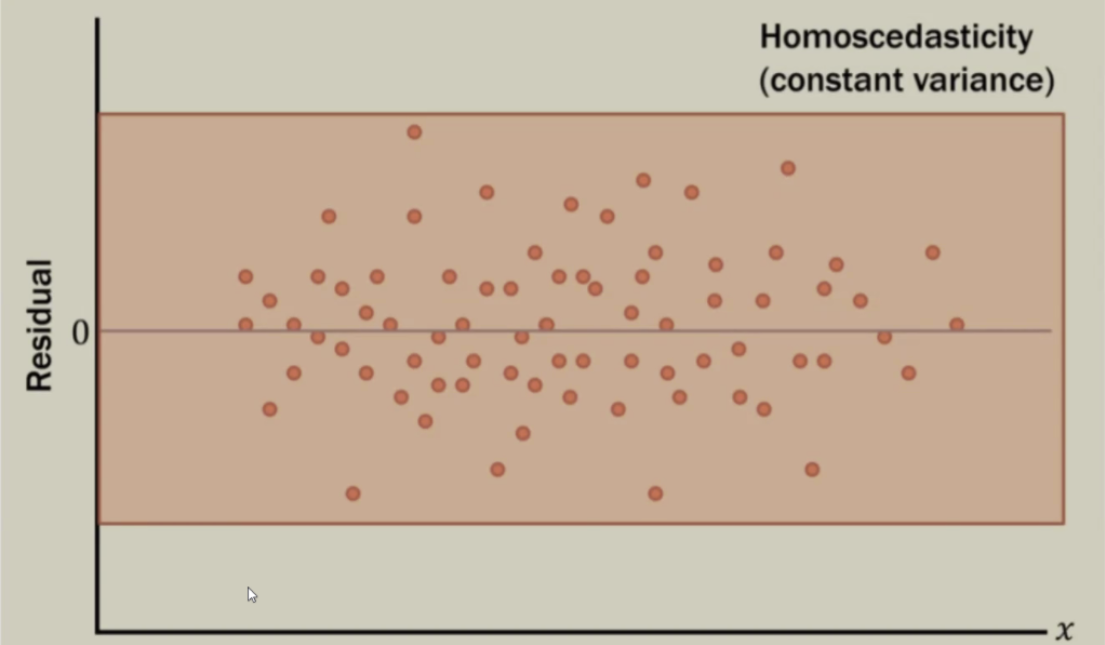

<div class="alert alert-block alert-info">
    
<b>MAE :</b> absolut alarak artı ve eksi değerlerin birbirini götürmesi önlenerek hataların büyüklükleri toplanarak ortalama alınır.

<b>MSE :</b> hataların varyasyonu da denebilir. küçük hataları büyütür. bunu inteprett edilmesi, yorumlanması zordur. 

bunu aşmak için <b>RMSE :</b> kullanılır. burada da hataların karesi alındıktan sonra tekrar root squared alınarak yine aynı seviyeye (datayla aynı metriğe) çekilir.

<div class="alert alert-block alert-info">

In [45]:
lin_model = LinearRegression()

<IPython.core.display.Javascript object>

In [46]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [47]:
lin_model.score(X_train, y_train)

# score : Return the coefficient of determination :math:`R^2` of the prediction.

0.9287961882422644

<div class="alert alert-block alert-info">
Training data iyi bir skor verdi. Test etmeden modelin performansı hakkinda kesin bir sey soyleyemeyiz.

In [48]:
lin_model.score(X_test, y_test)

# test datam için R^2 skorum.

-1.4764982217080726e+26

<div class="alert alert-block alert-warning">
Negative çıkması; train datamın test datasını temsil edemeyecek kadar kötü bir şekilde eğitildiğini gösteriyor. Bu model isimizi gormuyor, datasetimizi hic temsil edemiyor. Simdi bu durumu gorsellestirip plotlar uzerinde analiz yapalim.

<div class="alert alert-block alert-warning">
    Aşağıda residual'ları plotlanan datanın linear regresyon ile gösterimini yorumlayalim.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

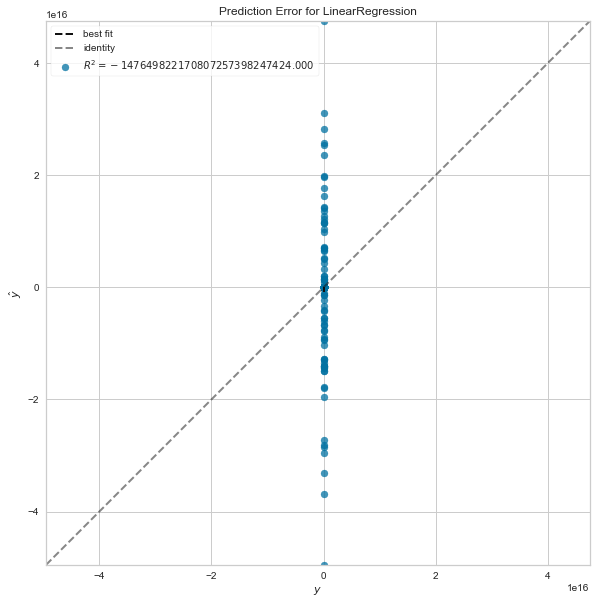

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
plt.figure(figsize=(10, 10))
visualizer = PredictionError(LinearRegression())

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.show()

In [50]:
lin_model.intercept_

-6780203769347701.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

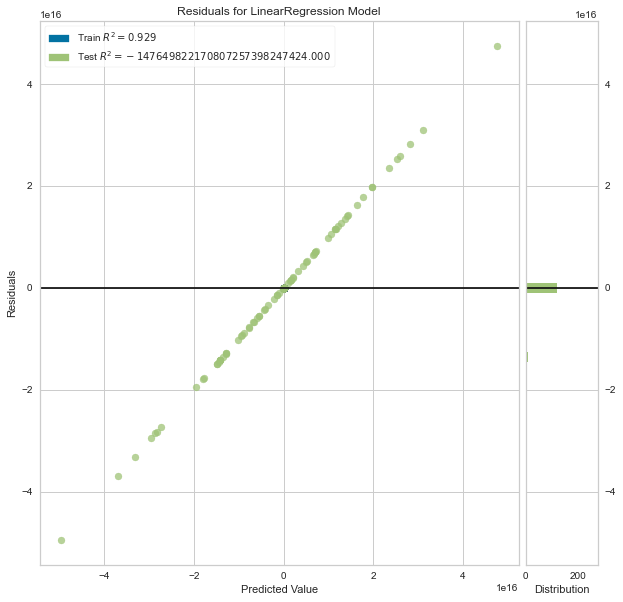

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
plt.figure(figsize=(10, 10))

model = ResidualsPlot(LinearRegression())

model.fit(X_train, y_train)

model.score(X_test, y_test)

model.show()

<div class="alert alert-block alert-info">
    Gorseli rakamlarlada gorelim ve yorumlayalim.

In [52]:
y_pred = lin_model.predict(X_test)
y_pred

array([ 1.62700000e+03,  3.39300000e+03,  7.99000000e+02,  1.58100000e+03,
        3.06300000e+03,  1.05025535e+16, -1.02571788e+16,  1.01300000e+03,
        1.51900000e+03,  1.42100000e+03,  2.21100000e+03,  3.13300000e+03,
       -1.40896900e+16,  1.60300000e+03,  3.60400000e+03,  6.00000000e+02,
        3.43100000e+03,  2.82614308e+16,  9.88000000e+02,  1.14910899e+16,
        2.30000000e+03,  3.06500000e+03, -9.41073866e+15,  5.07455729e+15,
        1.06000000e+03,  6.91000000e+02,  4.03200000e+03,  1.32700000e+03,
        2.25300000e+03, -1.78863074e+16,  6.98520357e+15,  2.96900000e+03,
        9.13000000e+02,  2.35000000e+03,  1.97494084e+16,  2.05100000e+03,
       -2.72187251e+16,  2.10700000e+03,  1.82900000e+03,  1.84300000e+03,
        1.52500000e+03,  1.58100000e+03,  1.77543762e+16,  1.84900000e+03,
        2.23900000e+03,  2.35437494e+16,  3.26899860e+15,  2.08200000e+03,
        1.16247296e+16,  1.41896559e+16, -8.89293441e+15,  2.21100000e+03,
       -2.17601214e+15,  

In [53]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [54]:
comparing = pd.DataFrame(my_dict)
comparing

# görültüğü üzere actual (gerçek) değerler ile predict edilmiş değerler arasında çok büyük farklar var.

<IPython.core.display.Javascript object>

,Actual,pred,residual
529,2086.38,1.627000e+03,4.593800e+02
342,2500.00,3.393000e+03,-8.930000e+02
352,1000.00,7.990000e+02,2.010000e+02
819,1571.43,1.581000e+03,-9.570000e+00
277,2734.38,3.063000e+03,-3.286200e+02
...,...,...,...
552,3038.91,-1.347751e+16,1.347751e+16
33,1923.08,-2.821348e+16,2.821348e+16
31,2307.70,2.583825e+16,-2.583825e+16
717,1501.01,-1.408195e+15,1.408195e+15


**EĞER R2 DEĞERİM AŞAĞIDAKİ GİBİ GELMİŞ OLSA :**

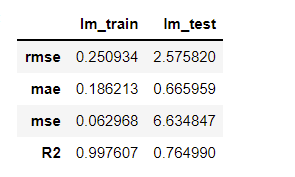

# Ridge Regression

<div class="alert alert-block alert-info">
    <b>Ridge Regresyon (L2 regularization):</b>
Çok değişkenli regresyon verilerini analiz etmede kullanılır. Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır. Over-fittinge karşı dirençlidir. Çok boyutluluğa çözüm sunar. Tüm değişkenler ile model kurar, ilgisiz değişkenleri çıkarmaz sadece katsayılarını sıfıra yaklaştırır. Modeli kurarken alpha (ceza) için iyi bir değer bulmak gerekir.

In [55]:
ridge_model = Ridge(random_state=42)

In [56]:
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [57]:
ridge_model.score(X_train, y_train)

# train datamın R2 skoru : 

0.8494831000302421

In [58]:
ridge_model.score(X_test, y_test)

# test datamın R2 skoru : 

0.36996091143901655

<div class="alert alert-block alert-warning">
modelimiz %37! lik bir dogrulukla tahmin edebiliyor. <p>
<b><i>Yorum</i></b>: Hic model olmasa tahmin etsek %50 ihtimalle tuttururuz, yani modelimiz tahmin etmekden daha da kotu calisiyor.<p>
    
   Simdi de Cross Validation ilave ederek scorelara bakalim.


In [59]:
scores = cross_validate(Ridge(random_state=42), X_train, y_train, scoring=['r2',
                                                          'neg_mean_absolute_error',
                                                          'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv=10)

In [60]:
pd.DataFrame(scores)

<IPython.core.display.Javascript object>

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.014003,0.004001,0.691615,-370.774048,-231209.109476,-480.842084
1,0.012003,0.004001,0.431356,-536.915009,-480272.490063,-693.016948
2,0.016512,0.004001,0.568630,-478.844679,-445130.704573,-667.181163
3,0.013003,0.004001,0.488462,-456.689719,-453469.392575,-673.401361
4,0.013004,0.004001,0.415478,-525.400082,-488315.943831,-698.796067
5,0.012002,0.004001,0.563989,-500.261000,-401382.791047,-633.547781
6,0.013003,0.004000,0.517789,-477.275000,-445218.497419,-667.246954
7,0.012003,0.004000,0.463081,-523.230823,-504730.050768,-710.443559
8,0.013004,0.004000,0.541121,-408.945232,-318844.818359,-564.663456
9,0.012003,0.005001,0.596816,-423.378331,-311607.992249,-558.218588


In [61]:
pd.DataFrame(scores)['test_r2'].mean()

<IPython.core.display.Javascript object>

0.5278337115763039

<div class="alert alert-block alert-info">
    Cross-Validation ile aldığım skorlardan öncelikli baktığım r^2 skorunun ortalaması 53 %'u train-CV ile karsilastirdigimizda bir azalma gozlemliyoruz.(train'in CV ile yaklasik ortalama degeri ~%72~ civarinda)<p>
    <b><i>Yorum</i></b>: modelin iş görmesi için hala performanslı değil

# Alpha Tuning

<div class="alert alert-block alert-info">
    
## <span style=" color:Purple"> ALPHA NEDİR? </span>

<p>Alpha bizim bir hyperparameter degerimizdir. </p>
.<p>

<p><b>Data setimiz için en uygun alpha (Default: 1.0) hiperparametresinin değerini nasıl bulabiliriz?</b></p>
.<p>
    
<p>Biz bunu manuel olarak deneme yanılma yöntemi ile kısa sürede bulamayız.</p>
.<p>
    
Bunun yerine, bir dizi farklı konfigürasyonu test etmek ve veri kümemiz için en iyi olanı keşfetmek iyi bir uygulamadır.<p>
.<p>

Ridge regression, 'L2 regularization' u gerçekleştirir. Yani Modelimizin optimizasyonu için katsayıların karelerinin toplamı faktörünü α değeri ile çarparak Residuallara (RSS'e) ekler:<p>
.<p>
Amaç = Residual Sum of Squares(RSS) + α * (katsayıların karelerinin toplamı)<p>
.<p>
Burada, α (alpha), RSS ile katsayıların karelerinin toplamını birbirine karşı dengeleyen parametredir.<p>
...

α çeşitli değerler alabilir. amacımız en uygun alpha değerini bulmak olacaktır.:<p>
<p>--<p>
α = 0:<p>
Amaç, basit doğrusal regresyonla aynı hale gelir.<p>
Sonucunda basit linear regression aynı katsayıları alacağız.<p>
--

In [62]:
alpha_space = np.linspace(0.01, 20, 300)

# linspace metodunu kullanarak, RidgeCV'de kontrol etmek üzere 300 adet farklı alpha değeri ürettik.

<IPython.core.display.Javascript object>

In [63]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)

In [64]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 7.68561873e-02, 1.43712375e-01, 2.10568562e-01,
       2.77424749e-01, 3.44280936e-01, 4.11137124e-01, 4.77993311e-01,
       5.44849498e-01, 6.11705686e-01, 6.78561873e-01, 7.45418060e-01,
       8.12274247e-01, 8.79130435e-01, 9.45986622e-01, 1.01284281e+00,
       1.07969900e+00, 1.14655518e+00, 1.21341137e+00, 1.28026756e+00,
       1.34712375e+00, 1.41397993e+0...
       1.84623077e+01, 1.85291639e+01, 1.85960201e+01, 1.86628763e+01,
       1.87297324e+01, 1.87965886e+01, 1.88634448e+01, 1.89303010e+01,
       1.89971572e+01, 1.90640134e+01, 1.91308696e+01, 1.91977258e+01,
       1.92645819e+01, 1.93314381e+01, 1.93982943e+01, 1.94651505e+01,
       1.95320067e+01, 1.95988629e+01, 1.96657191e+01, 1.97325753e+01,
       1.97994314e+01, 1.98662876e+01, 1.99331438e+01, 2.00000000e+01]),
        cv=10)

In [65]:
ridgecv.alpha_

# Bulunan en iyi alpha değerimiz

1.2134113712374581

In [66]:
ridgecv.best_score_

# en iyi alpha değeri ile elde edilen R2 skoru.

0.5284042000334063

In [67]:
ridgecv.score(X_train, y_train)

# Training sonucu elde edilen skorumuz.

0.8345220419861046

In [68]:
ridgecv.score(X_test, y_test)

# Test datasi uzerinde elde ettigimiz skorumuz.

0.3696250293248706

In [69]:
ridge_2 = Ridge(alpha=1.2134113712374581, random_state=42)

# Manual olarak alpha degeri girerek ve randomizasyonu sabitleyerek deneyelim

In [70]:
ridge_2.fit(X_train, y_train)

Ridge(alpha=1.2134113712374581, random_state=42)

In [71]:
ridge_2.score(X_train, y_train)

0.8345220419861046

In [72]:
ridge_2.score(X_test, y_test)

0.3696250293248706

<div class="alert alert-block alert-info">
    Datasetimizdeki featurelarin (anlamliligina) coefficient degerlerine gore siralamasina bakip datasetimizi inceleyelim.

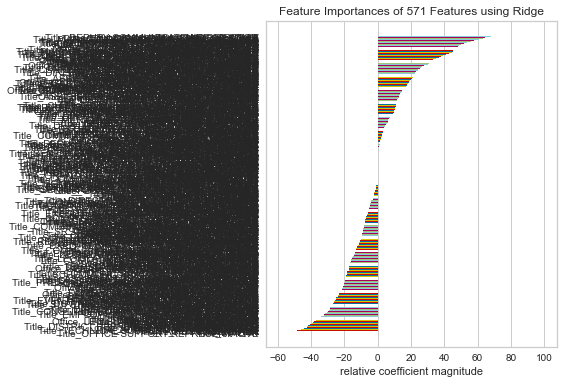

<AxesSubplot:title={'center':'Feature Importances of 571 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [73]:
viz = FeatureImportances(Ridge(alpha=1.213, random_state=42), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

In [74]:
y_pred = ridge_2.predict(X_test)

# residual'ların dağılımına bakabilmek için önce y_pred değerimi buluyorum. (y_test - y_pred  = residual)

<IPython.core.display.Javascript object>

C:\Users\w14039128\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


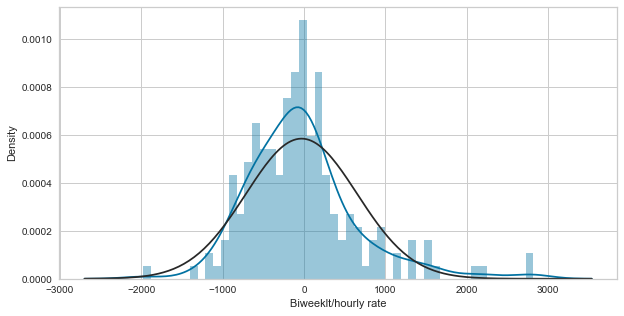

In [75]:
plt.figure(figsize=(10, 5))
sns.distplot((y_test - y_pred), bins=50, fit=stats.norm);

In [76]:
stats.skew(y_test - y_pred)

1.178311029527345

 <div class="alert alert-block alert-info">
lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.<p>

eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz ve dolayısıyla lineer regression için uygundur. <p>

0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız.<p>
    
Sadece Skewness degerinin sinirlari icerisine bakarak lineer regresyona uygun demek yeterli degildir. Mesela 
Heteroscedasticity seklinde bir dagilimi olabilir.

<div class="alert alert-block alert-warning">
   Asagidaki grafik uzerinden model hakkindaki yorumlariniz nelerdir?

<IPython.core.display.Javascript object>

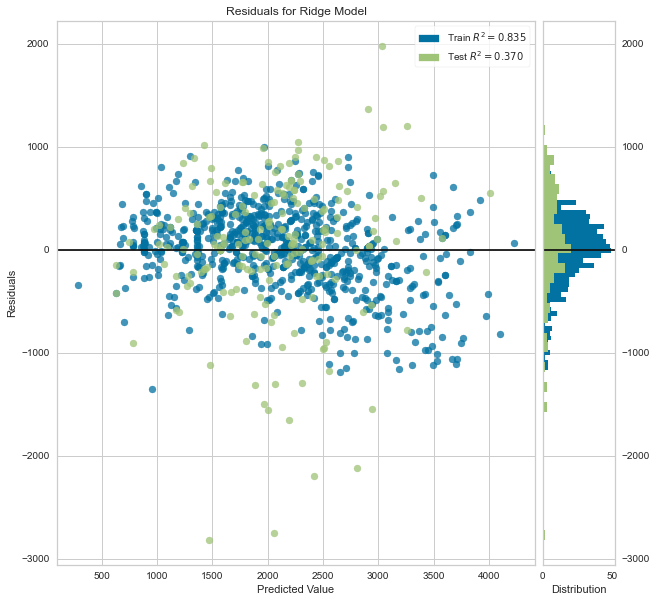

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
plt.figure(figsize=(10, 10))
model = ResidualsPlot(Ridge(alpha=1.213, random_state=42))

model.fit(X_train, y_train)

model.score(X_test, y_test)

model.show()

# Lasso Regression

<div class="alert alert-block alert-info">

<b>Lasso Regresyon (L1 regularization):</b>
Ürettiği modelin tahmin doğruluğunu ve yorumlanabilirliğini arttırmak için hem değişken seçimi hem de regularization yapar. Aynı ridge regresyonda olduğu gibi amaç hata kareler toplamını minimize eden katsayıları, katsayılara ceza uygularayarak bulmaktır. Fakat ridge regresyondan farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler. yani modelime katkısı düşük olan değişkenleri budar. 

In [78]:
lasso_model = Lasso(random_state=42)

In [79]:
lasso_model.fit(X_train, y_train)

Lasso(random_state=42)

In [80]:
lasso_model.score(X_train, y_train)

0.7823697667590425

In [81]:
lasso_model.score(X_test, y_test)

0.34508278440808093

In [82]:
scores = cross_validate(Lasso(random_state=42), X_train, y_train, scoring=['r2',
                                                          'neg_mean_absolute_error',
                                                          'neg_mean_squared_error',
                                                          'neg_root_mean_squared_error'], cv=10)

In [83]:
pd.DataFrame(scores)

<IPython.core.display.Javascript object>

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.011003,0.004517,0.718153,-368.244571,-211312.530640,-459.687427
1,0.013001,0.004001,0.409856,-554.501431,-498431.616180,-705.996895
2,0.016520,0.004001,0.542147,-506.954329,-472459.070815,-687.356582
3,0.013004,0.004001,0.436698,-477.392641,-499357.495211,-706.652316
4,0.012003,0.004002,0.365513,-561.525939,-530058.079416,-728.050877
5,0.012002,0.004001,0.587852,-475.459911,-379415.239619,-615.966914
6,0.013003,0.005001,0.457776,-516.439232,-500627.159187,-707.550111
7,0.012003,0.004002,0.379154,-554.735753,-583625.585610,-763.953916
8,0.011003,0.004001,0.501041,-442.879757,-346693.555368,-588.806891
9,0.014003,0.004001,0.557860,-440.099454,-341715.632904,-584.564481


In [84]:
pd.DataFrame(scores)['test_r2'].mean()

<IPython.core.display.Javascript object>

0.4956048610289403

In [85]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv=10, max_iter=100000, n_jobs =-1, random_state=42).fit(X_train, y_train)

In [86]:
lasso_cv_model.alpha_

0.8122742474916388

In [87]:
lasso_cv_model.score(X_train, y_train)

0.8135192860443252

In [88]:
lasso_cv_model.score(X_test, y_test)

0.35556318161579314

<div class="alert alert-block alert-warning">
    Yukarida bir benzerini gordugumuz Datasetimizdeki featurelarin (anlamliligina) coefficient degerlerine gore siralamasinin bu seferki hali hakkindaki yorumlariniz nelerdir?

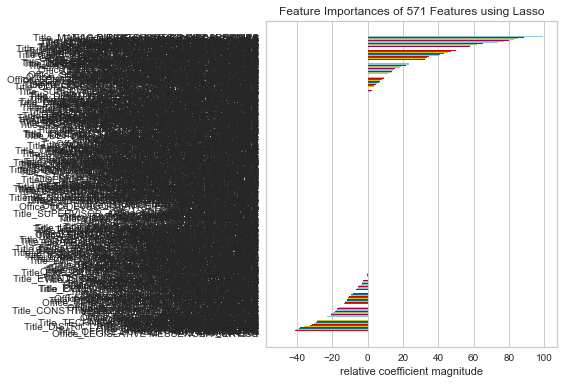

<AxesSubplot:title={'center':'Feature Importances of 571 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [89]:
viz = FeatureImportances(Lasso(alpha=0.8791304347826087, random_state=42), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

# ElasticNet

<div class="alert alert-block alert-info">
<b>Elastic Net:</b>

Amaç ridge ve lasso regresyon ile aynıdır ama elastic net, ridge ve lasso regresyonu birleştirir. Ridge regresyon tarzı cezalandırma ve lasso regresyon tarzında değişken seçimi yapar.

In [90]:
elm = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [91]:
elm.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [92]:
elm.score(X_train, y_train)

0.6302576586179983

In [93]:
elm.score(X_test, y_test)

0.31930731289999614

In [94]:
grid_params = {'alpha':alpha_space, 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [95]:
grid = GridSearchCV(ElasticNet(random_state=42), param_grid=grid_params, n_jobs=-1, verbose=2, cv=10)

In [96]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits


GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-02, 7.68561873e-02, 1.43712375e-01, 2.10568562e-01,
       2.77424749e-01, 3.44280936e-01, 4.11137124e-01, 4.77993311e-01,
       5.44849498e-01, 6.11705686e-01, 6.78561873e-01, 7.45418060e-01,
       8.12274247e-01, 8.79130435e-01, 9.45986622e-01, 1.01284281e+00,
       1.07969900e+00, 1...
       1.87297324e+01, 1.87965886e+01, 1.88634448e+01, 1.89303010e+01,
       1.89971572e+01, 1.90640134e+01, 1.91308696e+01, 1.91977258e+01,
       1.92645819e+01, 1.93314381e+01, 1.93982943e+01, 1.94651505e+01,
       1.95320067e+01, 1.95988629e+01, 1.96657191e+01, 1.97325753e+01,
       1.97994314e+01, 1.98662876e+01, 1.99331438e+01, 2.00000000e+01]),
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             verbose=2)

In [97]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [98]:
grid.best_score_

0.5281738555413359

<div class="alert alert-block alert-success">

## <span style=" color:purple"> Yorumlariniz ve Cikarimlariniz ? </span>

**

**

<div class="alert alert-block alert-success">

## <span style=" color:purple"> Sonuc </span>
Bugun bir payroll datasini ML calismasi icin gereken Data Analysis adimlarini uyguladiktan sonra Lineer Regresyon bazli ML modelleri kurduk.<p>
    4 farkli metotla bu calismayi gerceklestirdik;<p>
    -Linear Regression<p>
    -Ridge Regression<p>
    -Lasso Regression<p>
    -Elasticnet<p>
    Metotlari ile Machine learning modeli kurup bir Payroll datasi uzerinde calistirdik.<p>
    Ortaya cikan modellerimiz training te iyi denilebilecek % lerde performans gostermesine ragmen test datamız ile test ettigimizde cok dusuk bir skor elde ettigini gorduk. Bu gosteriyor ki bizim bu datasetten faydalanmamiz icin bir yerlerde iyilestirme yapmamiz gerekiyor.

<div class="alert alert-block alert-warning">
    Ne gibi iyilestirmeler yapabiliriz? Fikirlerimizi paylasip uzerinde konusalim!